In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7, 3.5)
plt.rcParams['figure.facecolor'] = 'w'

In [2]:
fs = 1e6/100
slot_len = round(23.8e-3 * fs)
slot_len

238

In [3]:
slots_per_frame = 16

In [4]:
# These are measured in 200 kHz bandwidth
sig_plus_noise = np.fromfile('SDR_sampl_100kS_busy_signal_power.f32', 'float32')
noise = np.fromfile('SDR_sampl_100kS_busy_noise_power.f32', 'float32')
# We use SNR in 100 kHz bandwidth, so we have a factor 2 here
snr = 2 * (sig_plus_noise - noise) / noise

These plots show the signal power in the 16 slots in each TDMA frame as 4x4 grid that we should read left to right and top to bottom. Frames are numbered relative to the start of the recording. The first ~14 slots in the recording are discarded in order to start at the beginning of a frame.

/tmp/ipykernel_247031/672498655.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt.subplots(4, 4, figsize=(10, 6), sharex=True, sharey=True)


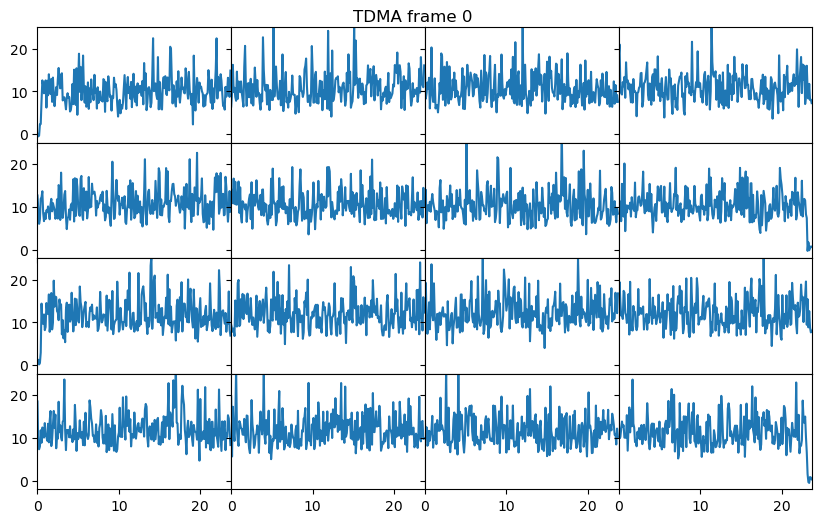

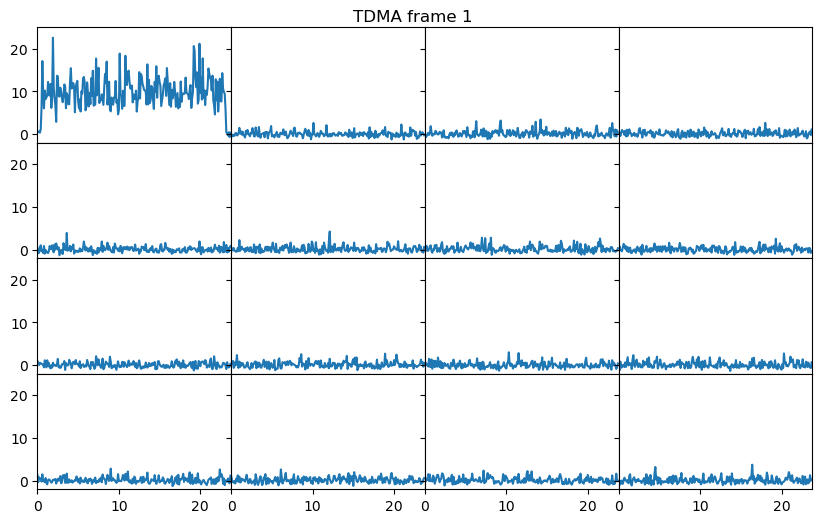

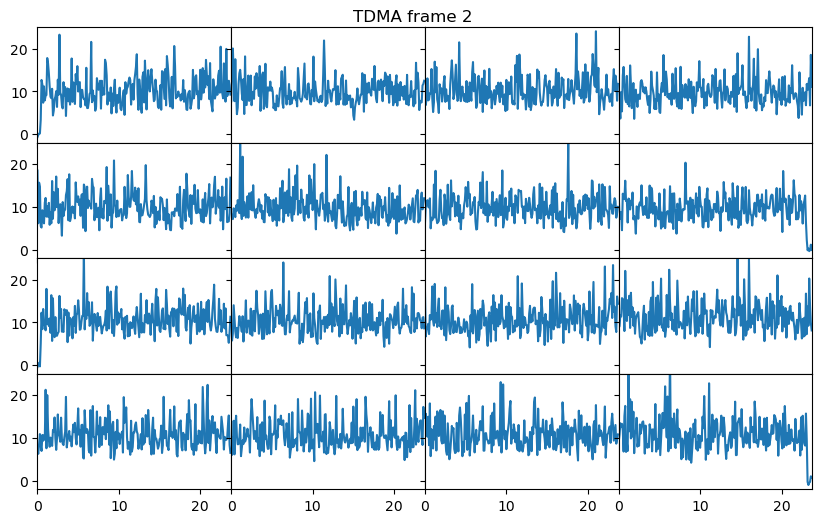

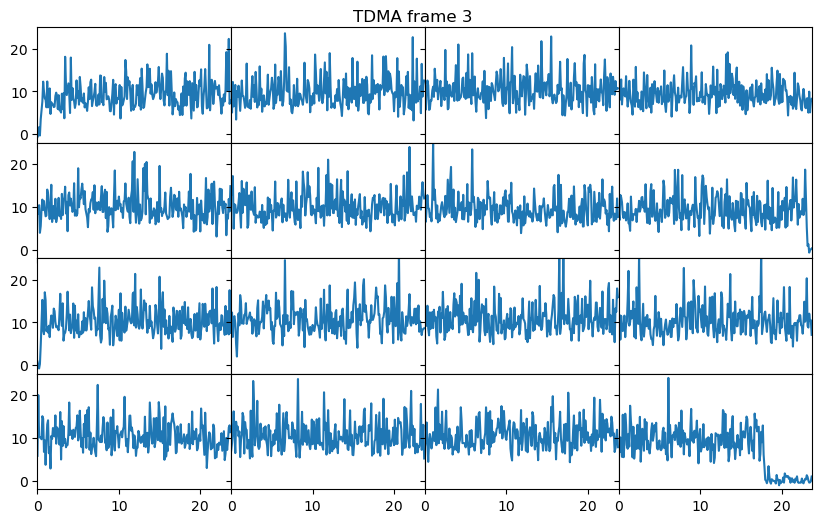

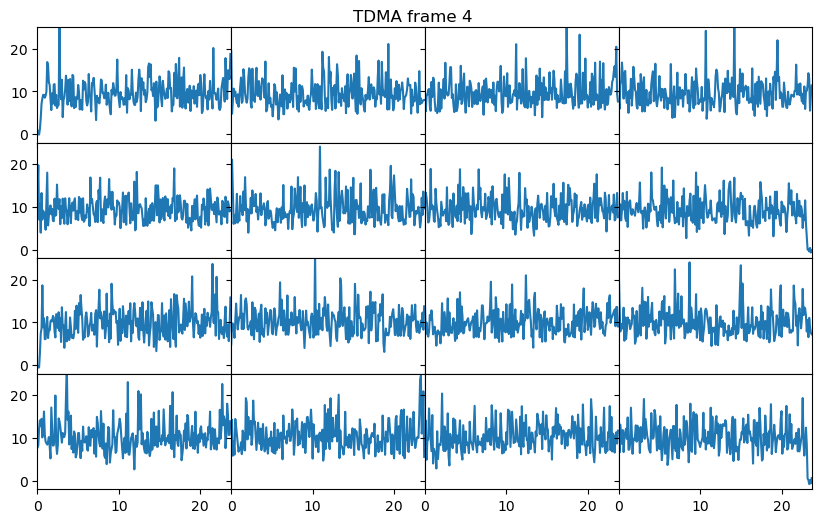

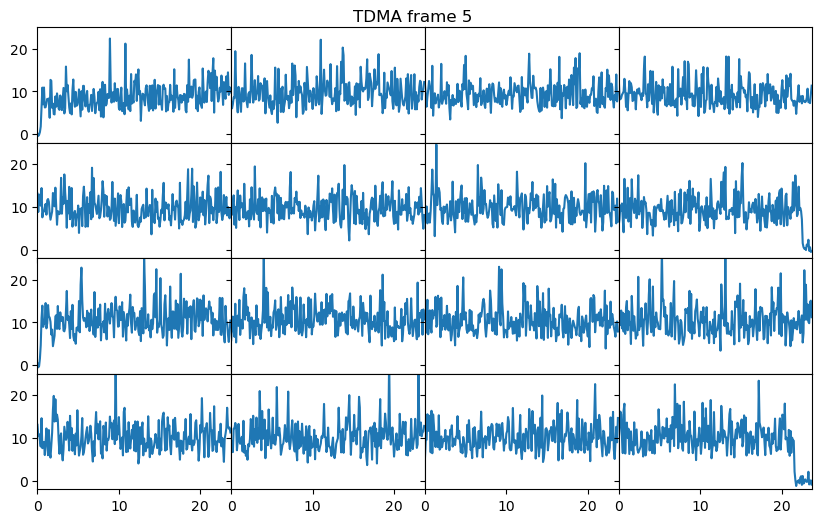

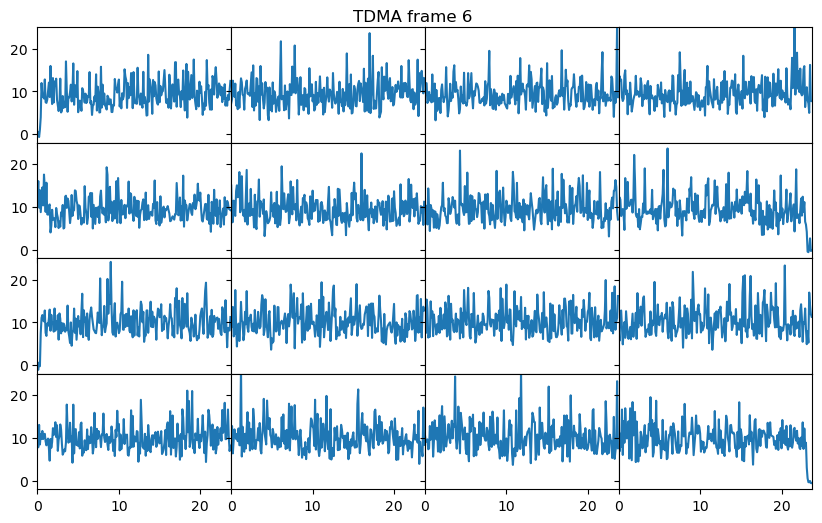

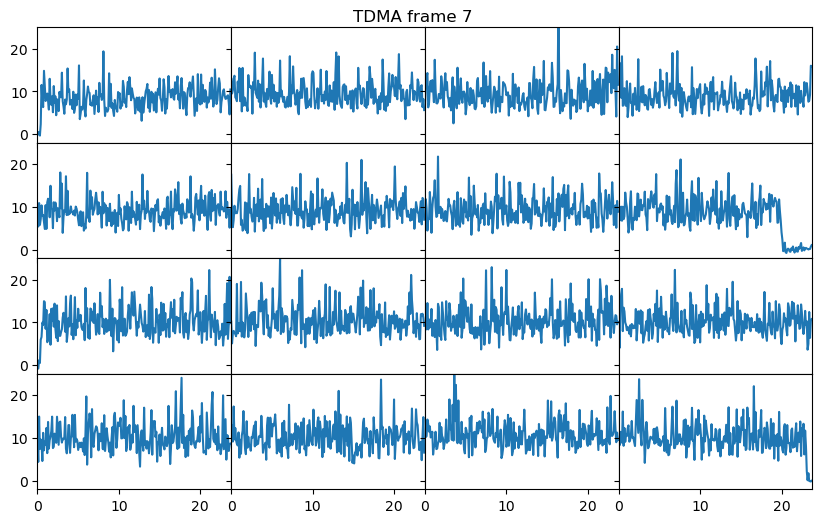

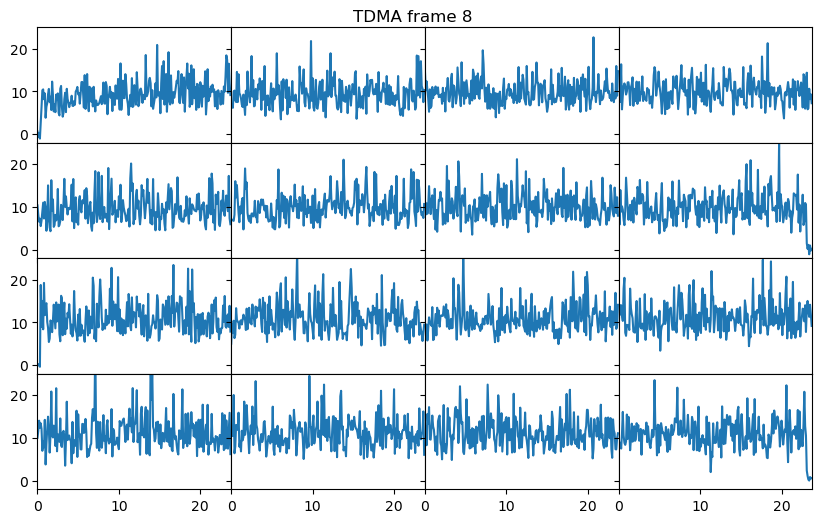

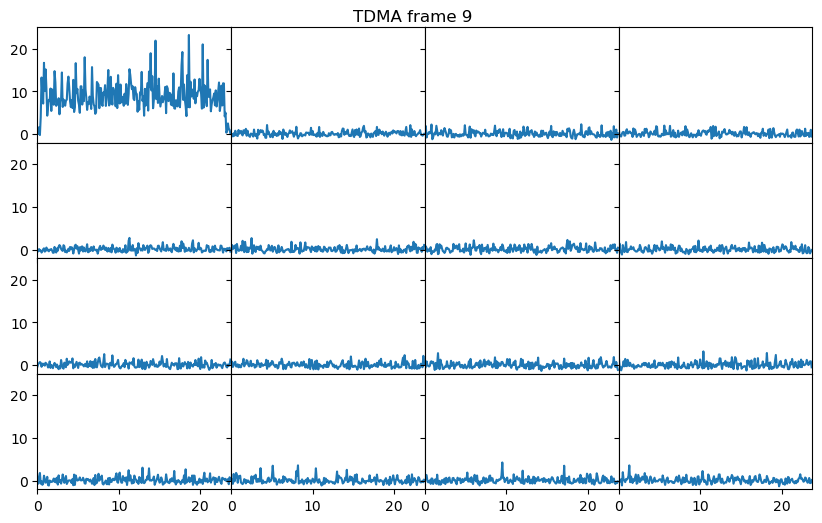

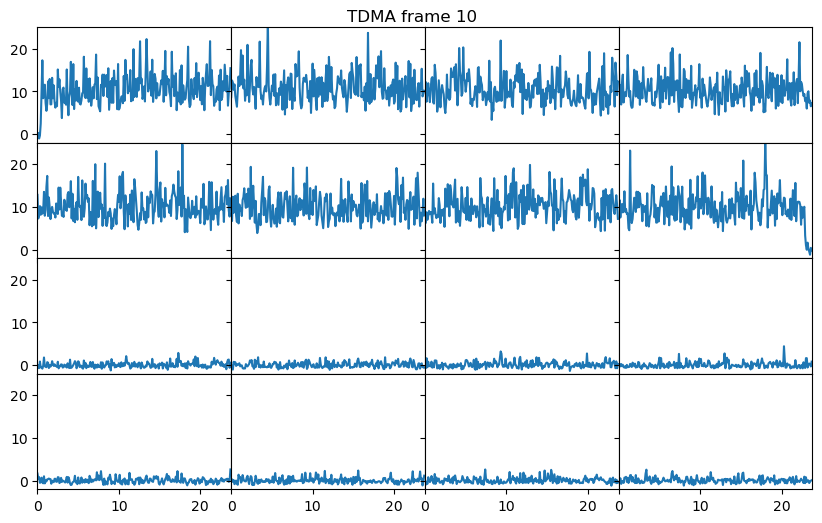

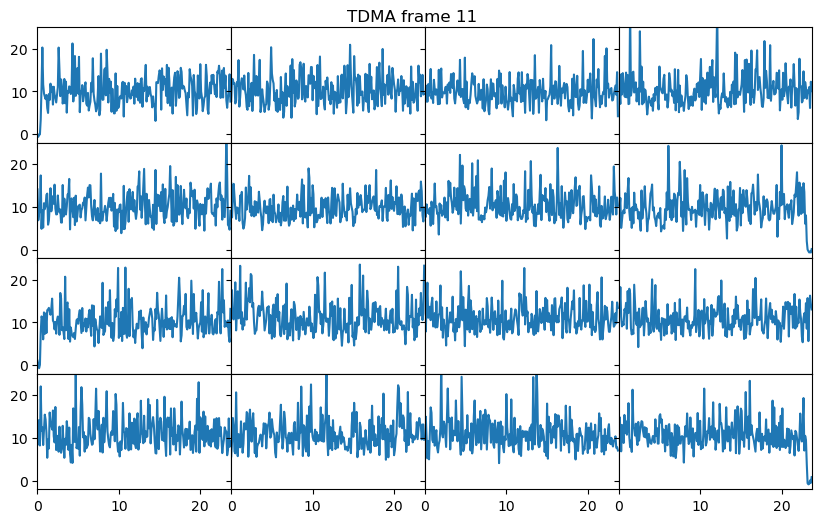

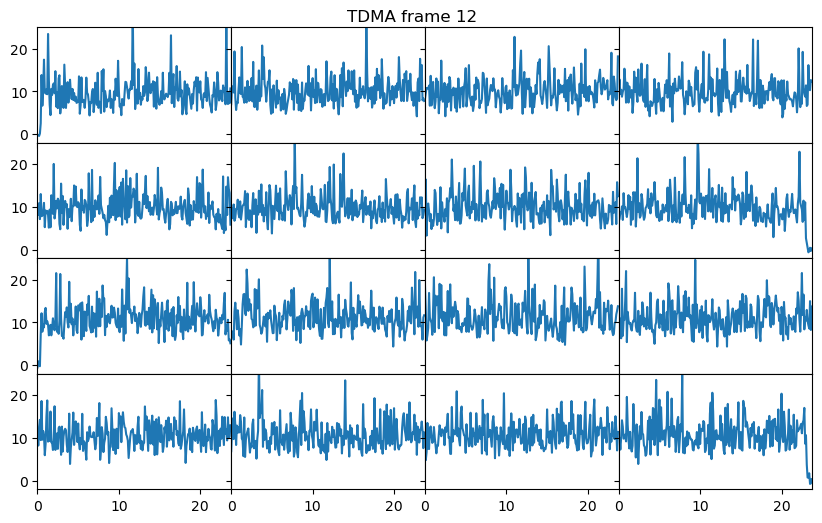

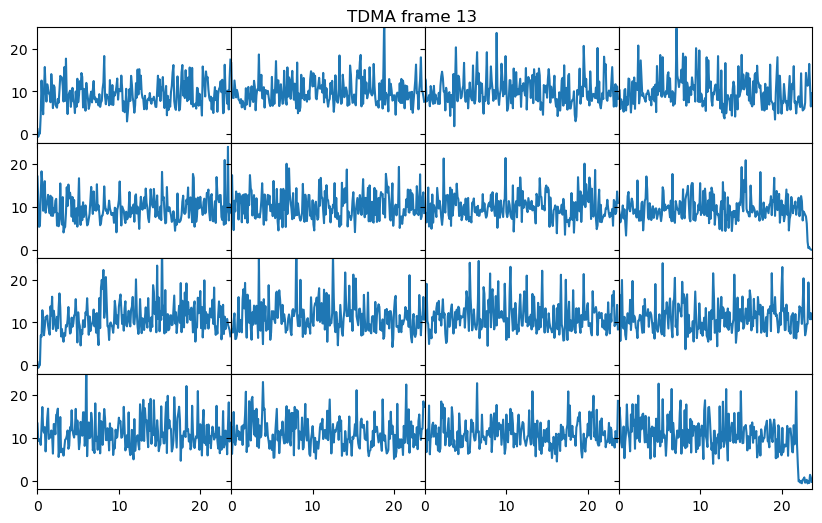

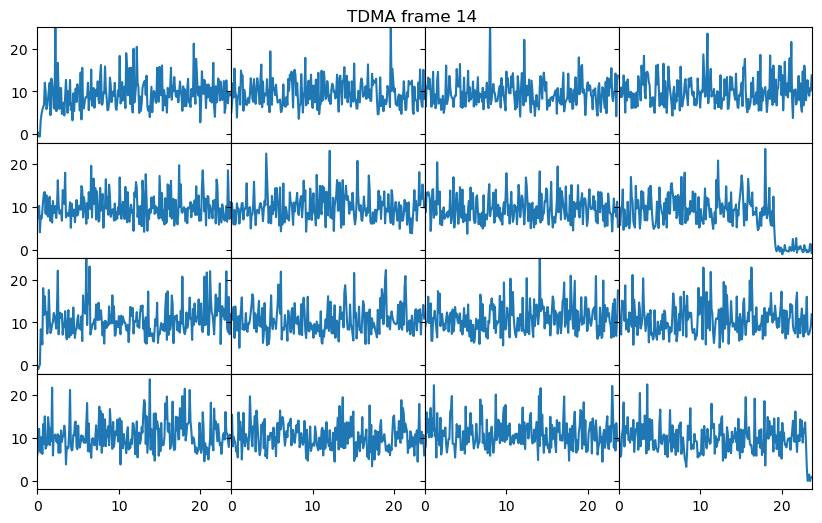

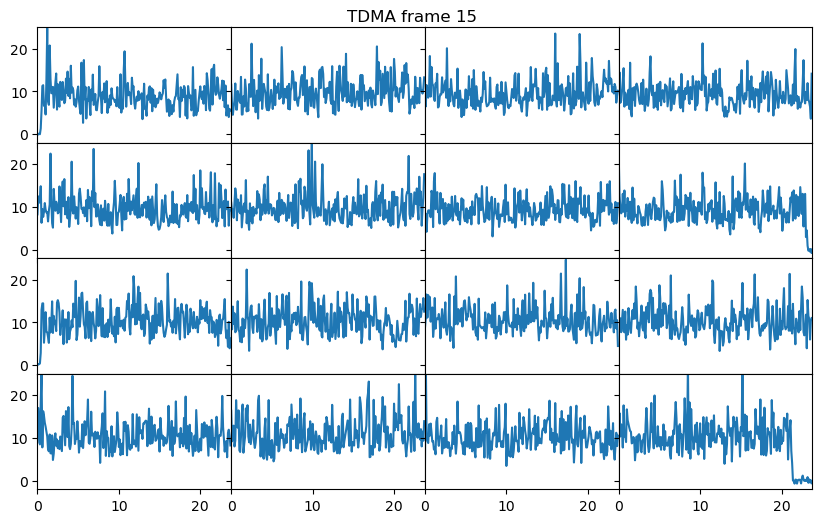

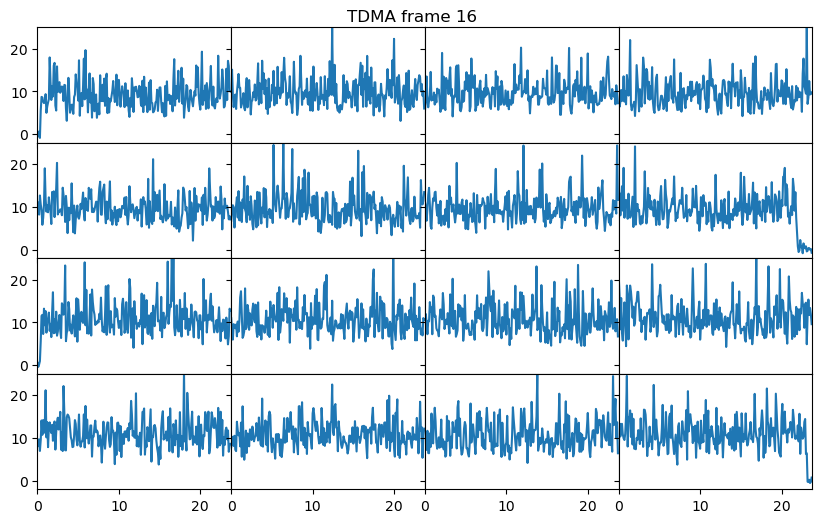

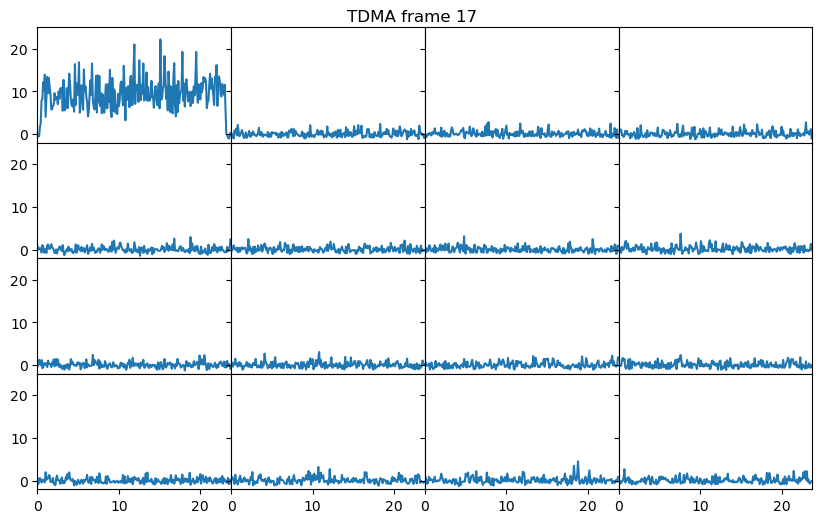

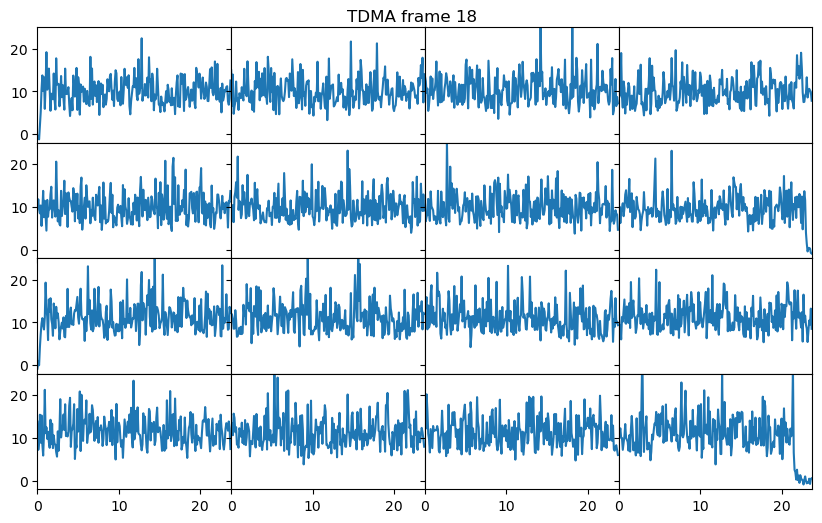

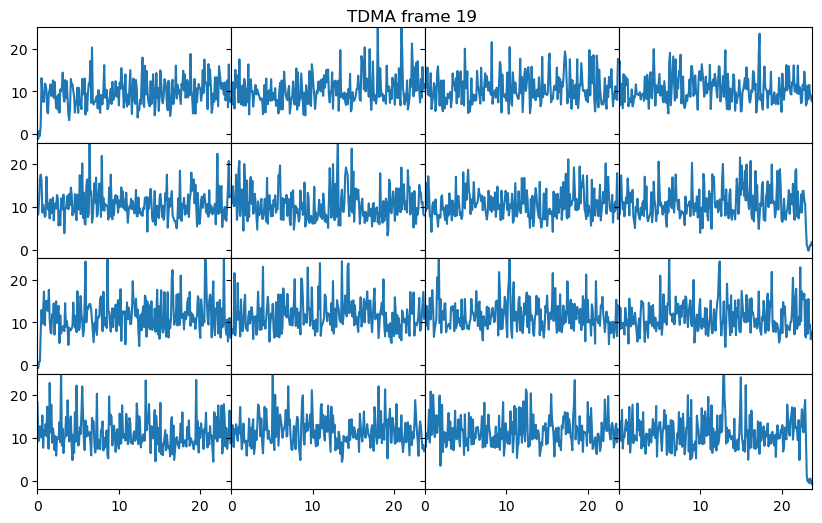

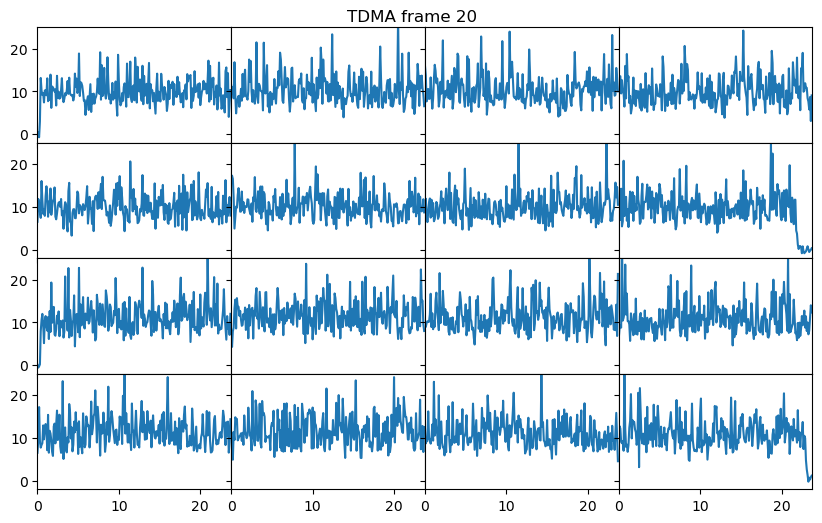

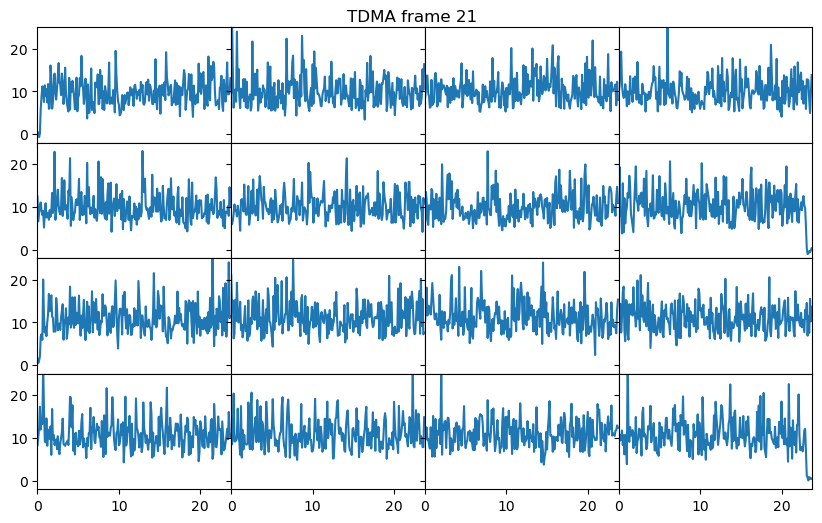

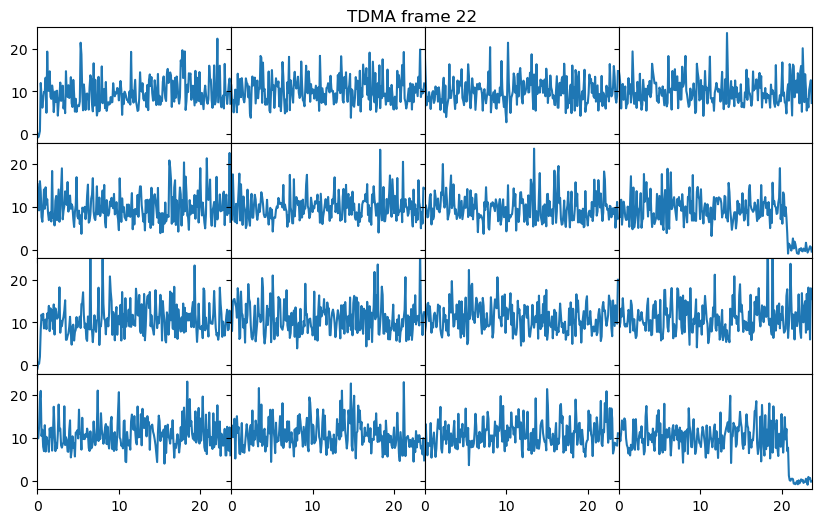

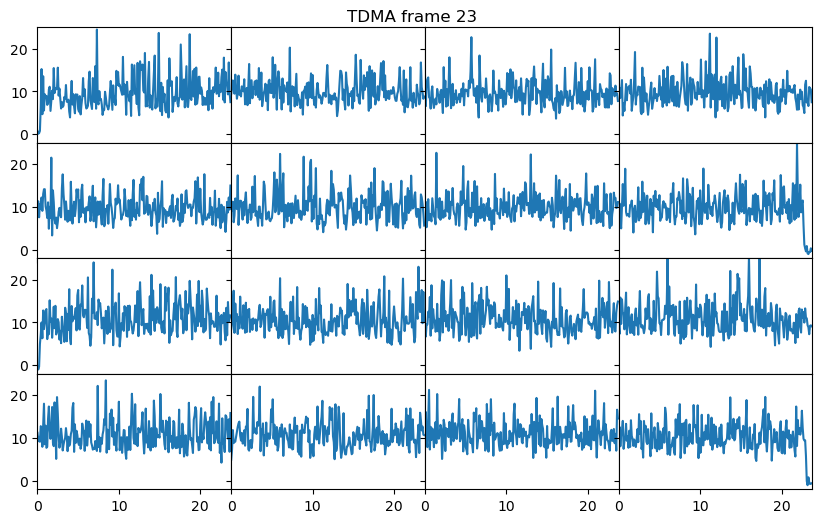

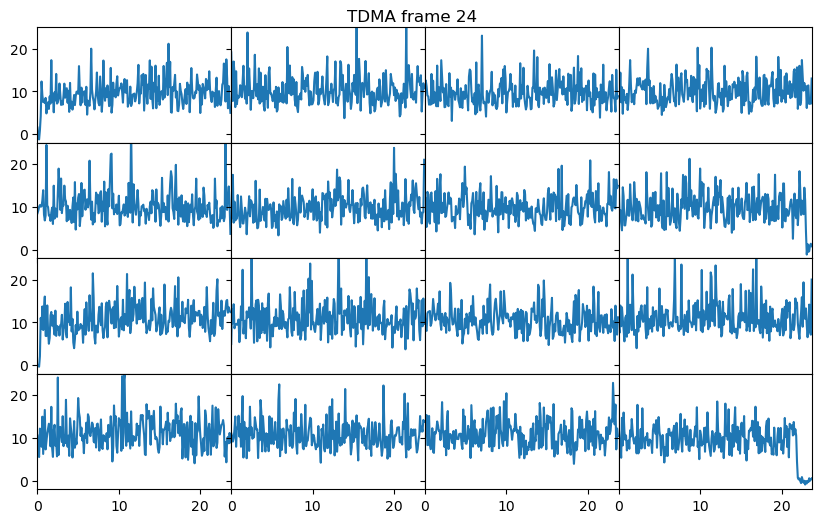

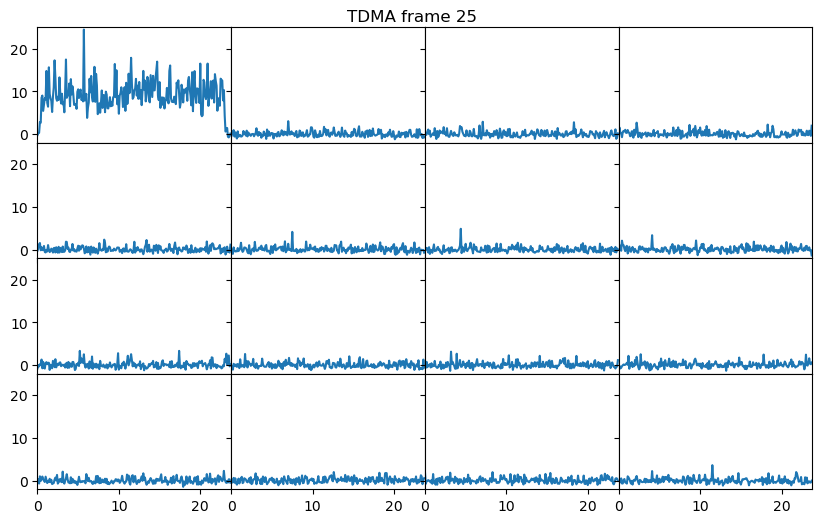

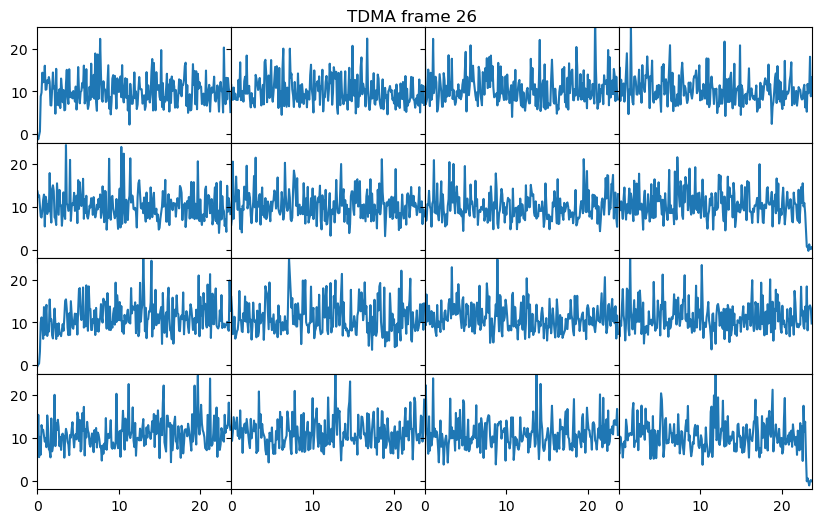

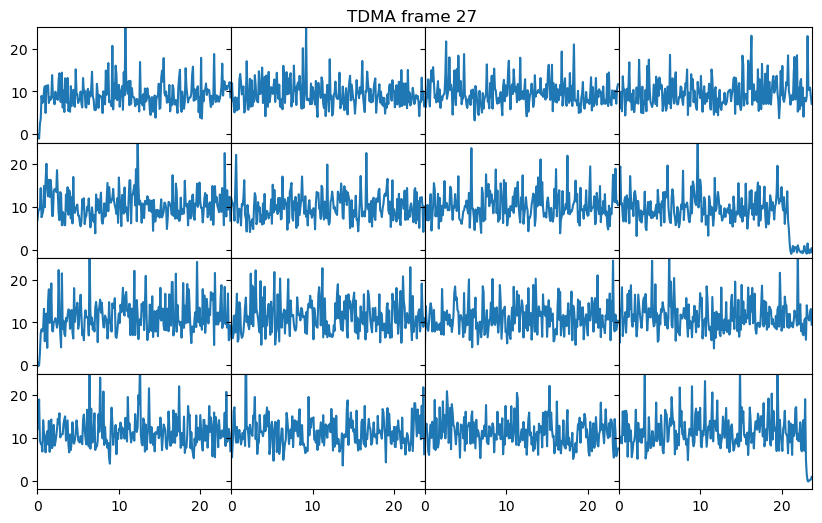

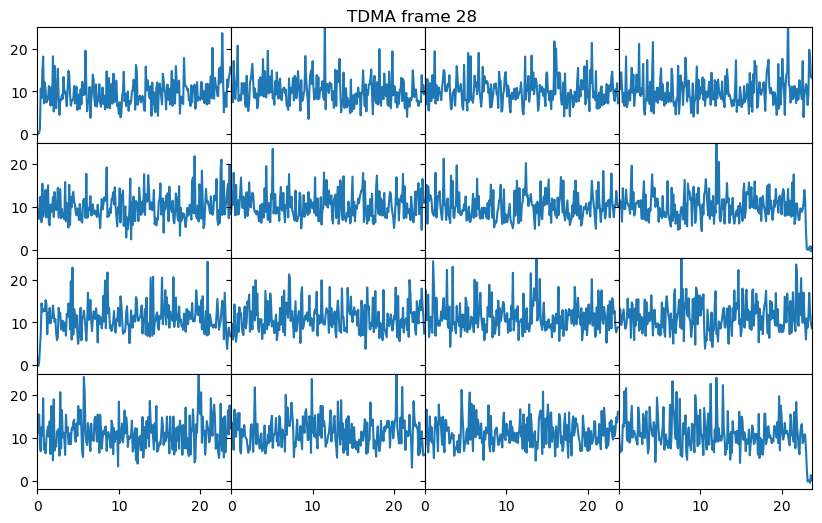

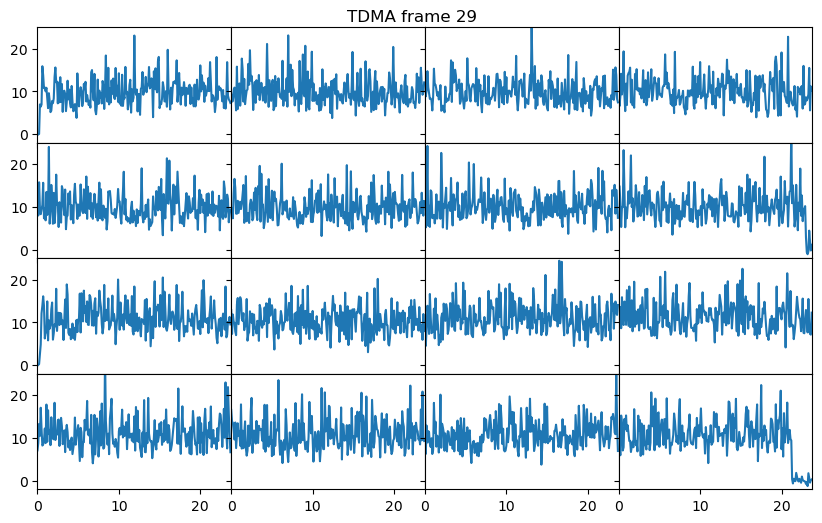

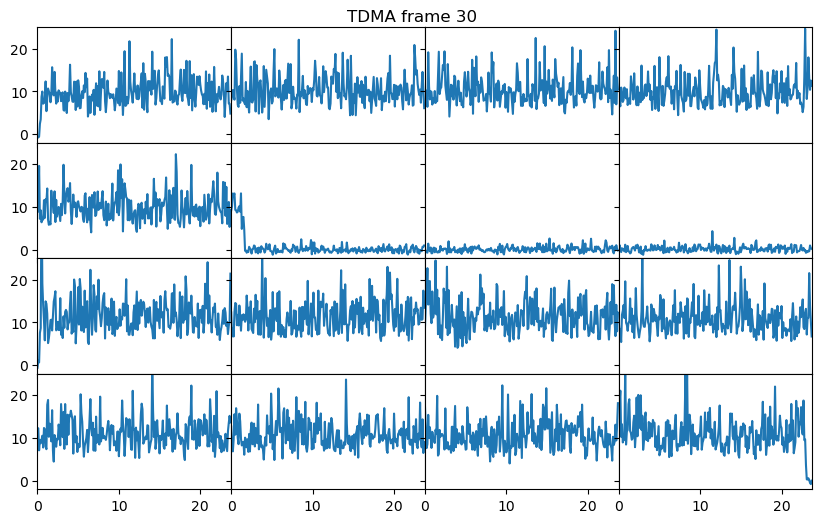

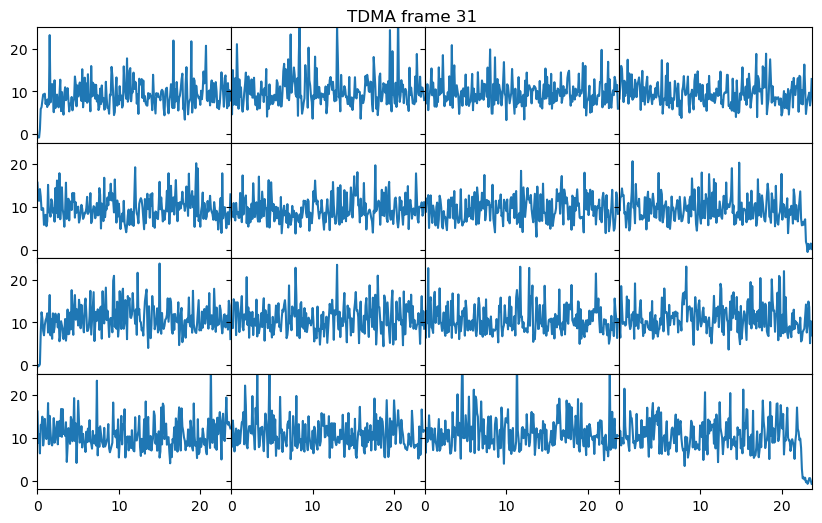

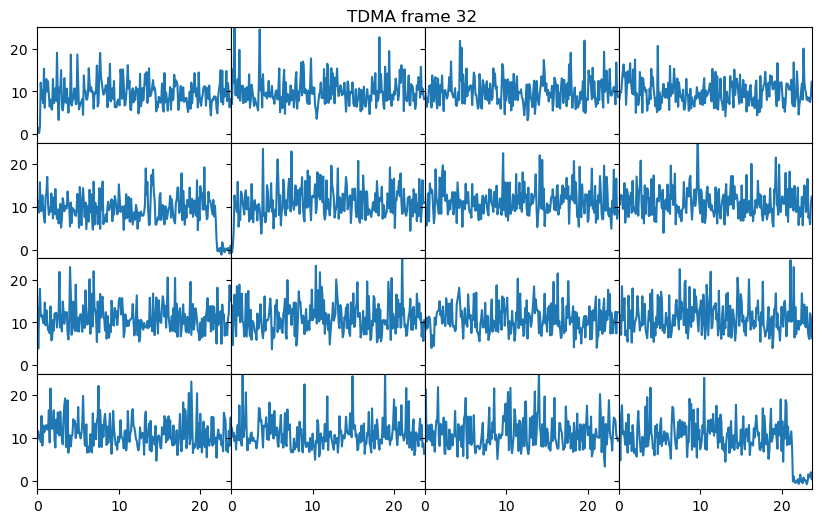

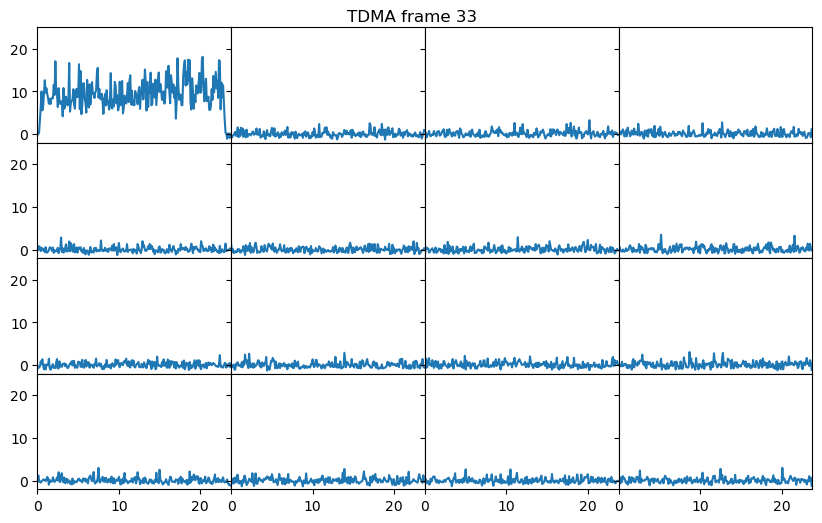

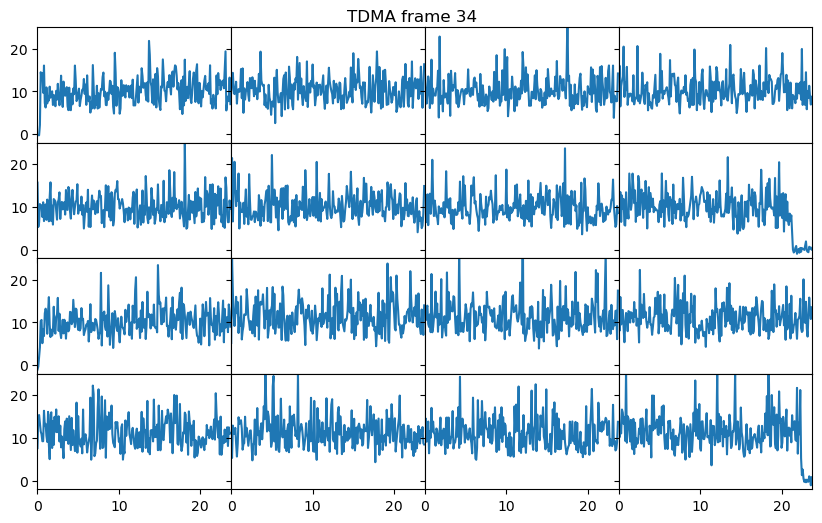

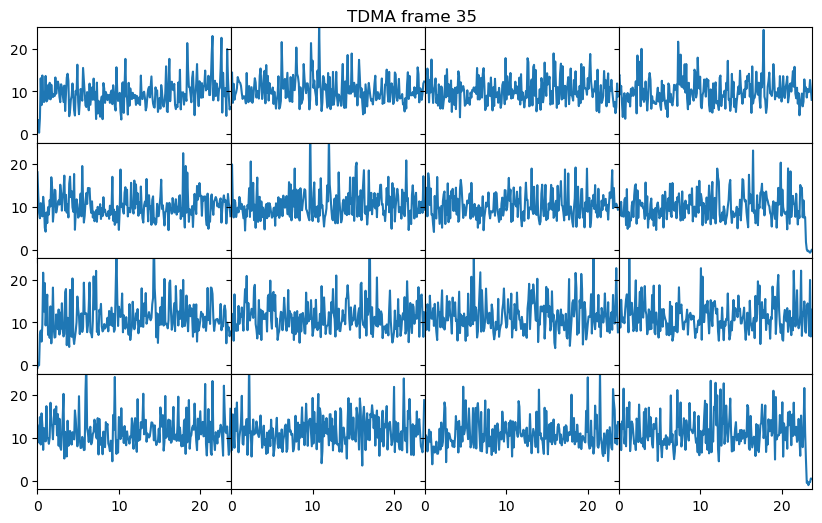

In [5]:
skip = (6 + 8) * slot_len + 138
nframes = int((snr.size - skip) / (slot_len * slots_per_frame))
for j in range(nframes):
    fig, axs = plt.subplots(4, 4, figsize=(10, 6), sharex=True, sharey=True)
    for k, ax in enumerate(axs.ravel()):
        ax.plot(np.arange(slot_len)/fs*1e3,
                snr[skip+j*slot_len*slots_per_frame+k*slot_len:][:slot_len])
        ax.set_ylim(-2, 25)
        ax.set_xlim(0, slot_len/fs*1e3)
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle(f'TDMA frame {j}', y=0.91)

In [6]:
t_snrs = []
snrs = []
for j in range(nframes):
    for k in range(slots_per_frame):
        start = skip + j*slot_len*slots_per_frame + k*slot_len
        slot = slice(start, start + slot_len)
        sig_plus_noise_avg = np.average(sig_plus_noise[slot])
        noise_avg = np.average(noise[slot])
        snr = 2 * (sig_plus_noise_avg - noise_avg) / noise_avg
        t_snrs.append(start / fs)
        snrs.append(snr)
snrs = np.array(snrs)
snrs[snrs < 0] = np.nan

This plots shows SNR in 100 kHz bandwidth, measured by time averaging within each slot.

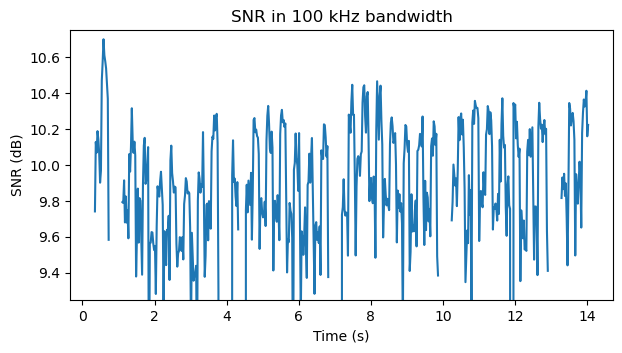

In [7]:
plt.plot(t_snrs, 10*np.log10(snrs))
plt.ylim((9.25, 10.75))
plt.ylabel('SNR (dB)')
plt.xlabel('Time (s)')
plt.title('SNR in 100 kHz bandwidth');